In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
# Step 1: Load the dataset
data = load_wine()
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [32]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Wine Class')
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


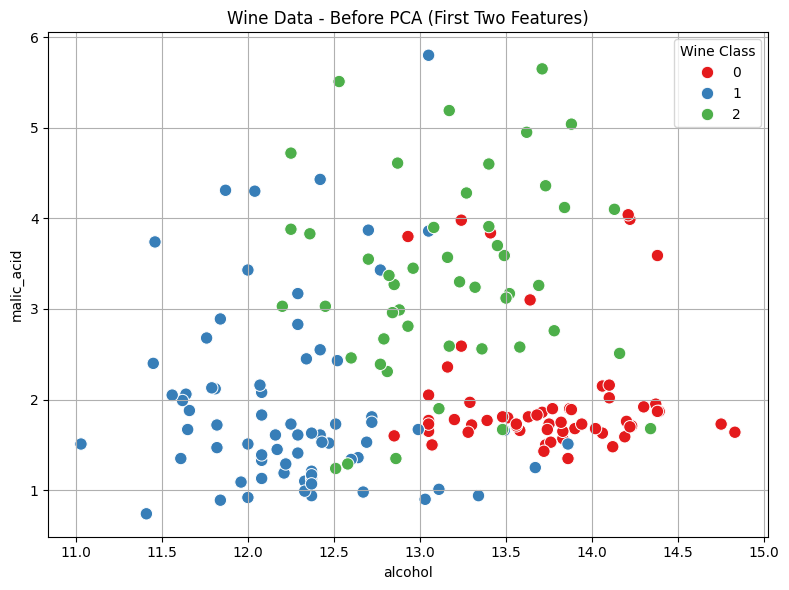

In [33]:
# Step 2: Visualize before PCA (using first two original features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='Set1', s=80)
plt.title('Wine Data - Before PCA (First Two Features)')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.grid(True)
plt.legend(title='Wine Class')
plt.tight_layout()
plt.show()

In [34]:
# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
# Step 4: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
# Step 5: Create DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Wine Class'] = y

In [37]:
# Step 6: Explained variance
explained_var = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_var}")

Explained variance by PC1 and PC2: [0.36198848 0.1920749 ]


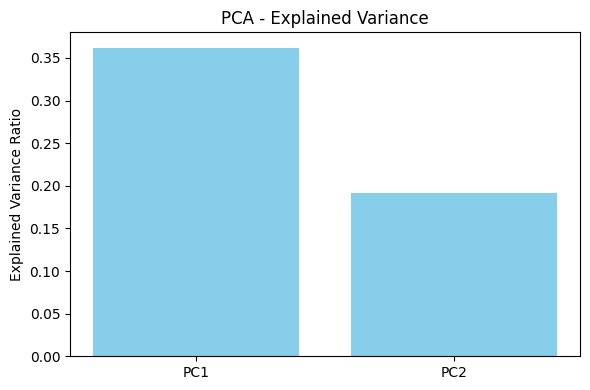

In [38]:
# Step 7: Plot explained variance ratio
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_var, color='skyblue')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.tight_layout()
plt.show()

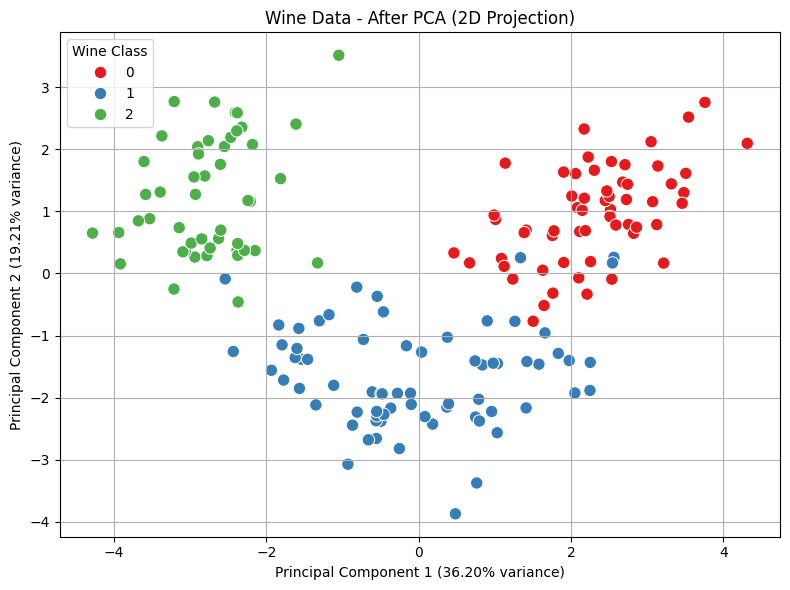

In [39]:
# Step 8: Visualize after PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Wine Class', palette='Set1', s=80)
plt.title('Wine Data - After PCA (2D Projection)')
plt.xlabel(f'Principal Component 1 ({explained_var[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_var[1]*100:.2f}% variance)')
plt.grid(True)
plt.legend(title='Wine Class')
plt.tight_layout()
plt.show()